# Visualisatie

In [1]:
# All imports

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import calendar

# from pyaxis import pyaxis

from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [2]:
# Laad alle datasets

# df_CPI_processed = pd.read_csv('processed_data/CPI_2024-2024.csv')
df_WDI_all = pd.read_csv('dataset_sources/WDI_Data.csv')
df_annual_net_earnings_processed = pd.read_csv('processed_data/Annual_Net_Earnings_Sweden_2014-2024.csv')

## Perspectief 1

In [3]:
# Schrijf en maak visualisaties voor pespectief 1 hier; origineel te vinden in notebook.ipynb

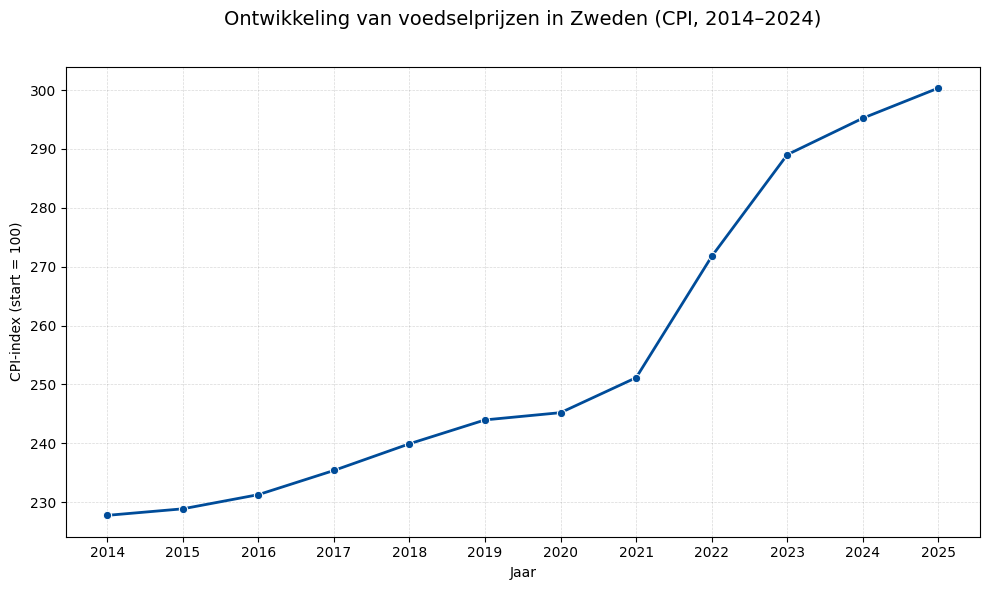

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("processed_data/CPI.csv")


df['month'] = pd.to_datetime(df['month'].str.replace('M', '-'), format='%Y-%m')
df = df.sort_values('month')


df['monthly_change'] = df['DATA']
df['cpi_index'] = 100.0
for i in range(1, len(df)):
    prev = df.loc[i-1, 'cpi_index']
    change = df.loc[i, 'monthly_change']
    df.loc[i, 'cpi_index'] = prev * (1 + change / 100)


df['year'] = df['month'].dt.year
yearly_cpi = df.groupby('year')['cpi_index'].mean().reset_index()


fig, ax = plt.subplots(figsize=(10, 6))


sns.lineplot(data=yearly_cpi, x='year', y='cpi_index',
             marker='o', linewidth=2, color='#004c99', ax=ax)


plt.title("Ontwikkeling van voedselprijzen in Zweden (CPI, 2014–2024)",
          fontsize=14, pad=30)
plt.xlabel("Jaar")
plt.ylabel("CPI-index (start = 100)")
plt.xticks(yearly_cpi['year'])


ax.grid(True, color='gray', linestyle='--', linewidth=0.5, alpha=0.3)


plt.subplots_adjust(top=0.88)
plt.tight_layout()

plt.show()


Deze grafiek toont de ontwikkeling van het CPI(consumer price index) tussen 2014 en 2024 voor Zweden. Voor 2014 is er een start waarde van 100 genomen. Het CPI is duidelijk gestegen in de afgelopen 10 jaar en vooral vanaf 2021. Dat betekend dat de gemiddelde kosten van levensonderhoud zijn toegenomen. 

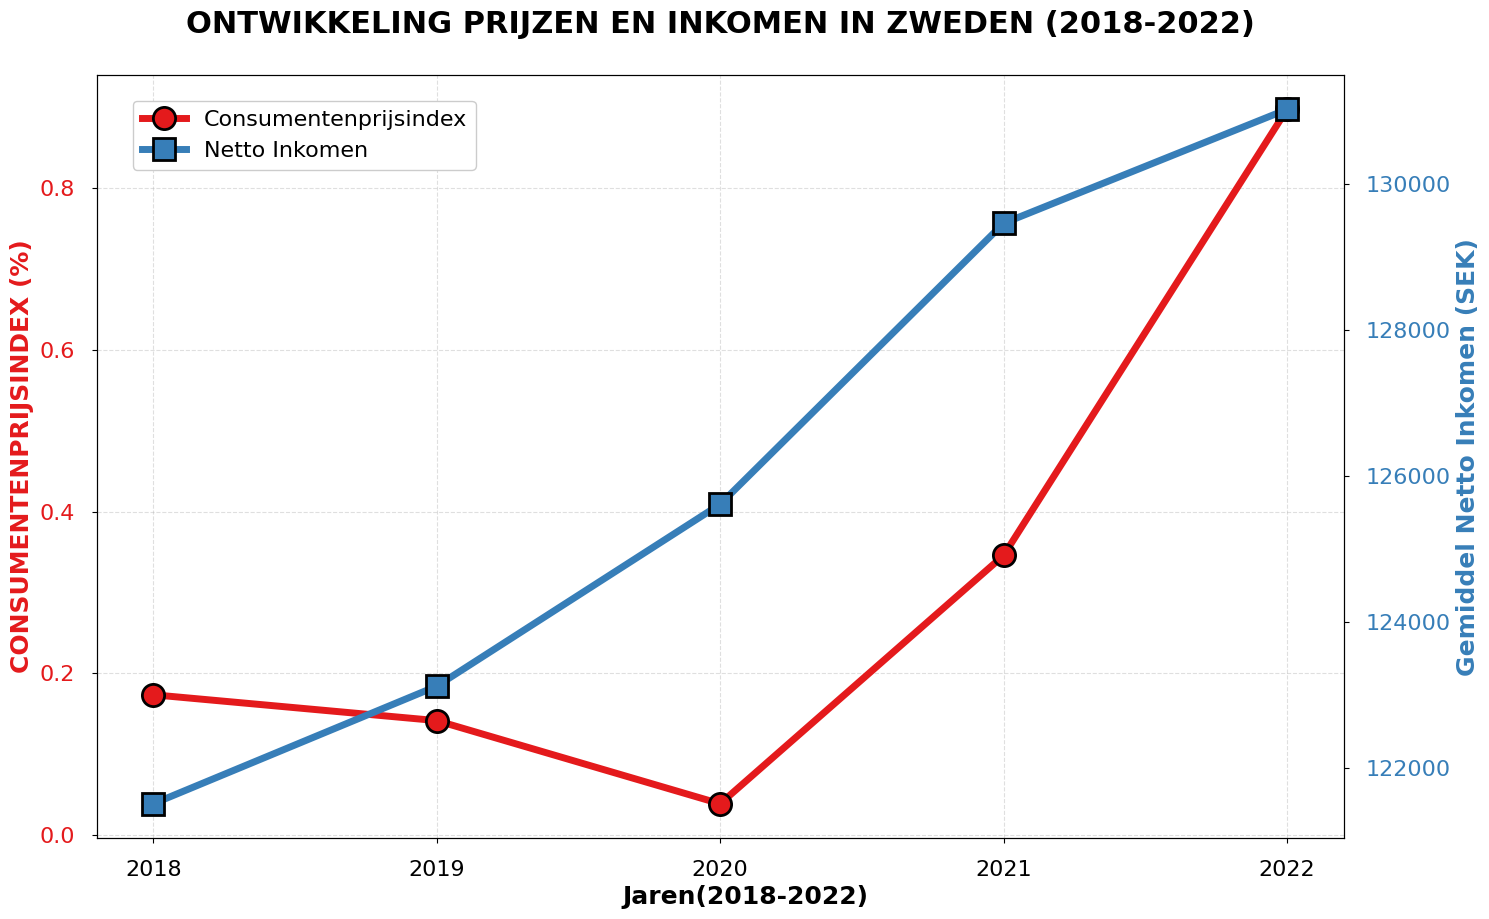

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Laad de verwerkte datasets
df_CPI = pd.read_csv('processed_data/CPI.csv')  
df_income = pd.read_csv('processed_data/Annual_Net_Earnings_Sweden_2014-2024.csv')

# Verwerk data
df_CPI['Year'] = df_CPI['month'].str.extract(r'(\d{4})').astype(int)
avg_cpi_per_year = df_CPI.groupby('Year')['DATA'].mean()
avg_income_per_year = df_income.groupby('TIME_PERIOD')['OBS_VALUE'].mean()

# Filter voor 2018-2022
years_range = range(2018, 2023)
avg_cpi_per_year = avg_cpi_per_year[avg_cpi_per_year.index.isin(years_range)]
avg_income_per_year = avg_income_per_year[avg_income_per_year.index.isin(years_range)]

# Maak de visualisatie
plt.figure(figsize=(15, 9))

# CPI (rode lijn)
ax1 = plt.gca()
color = '#e41a1c'
ax1.set_xlabel('', fontsize=0)  # Verwijder x-as label
ax1.set_ylabel('CONSUMENTENPRIJSINDEX (%)', 
              color=color, fontsize=18, fontweight='bold', linespacing=1.8)
price_line = ax1.plot(avg_cpi_per_year.index, avg_cpi_per_year.values, 
                     'o-', color=color, linewidth=5, markersize=16,
                     markeredgecolor='black', markeredgewidth=2, 
                     label='Consumentenprijsindex')[0]

# Grotere tick labels
ax1.tick_params(axis='y', labelcolor=color, labelsize=16, pad=12)
ax1.set_xticks(list(years_range))
ax1.tick_params(axis='x', labelsize=16, pad=12)

# Netto inkomen (blauwe lijn)
ax2 = ax1.twinx()
color = '#377eb8'
ax2.set_ylabel('Gemiddel Netto Inkomen (SEK)', 
              color=color, fontsize=18, fontweight='bold', linespacing=1.8)
income_line = ax2.plot(avg_income_per_year.index, avg_income_per_year.values, 
                      's-', color=color, linewidth=5, markersize=16,
                      markeredgecolor='black', markeredgewidth=2, 
                      label='Netto Inkomen')[0]
ax2.tick_params(axis='y', labelcolor=color, labelsize=16, pad=12)

# Titel
plt.title('ONTWIKKELING PRIJZEN EN INKOMEN IN ZWEDEN (2018-2022)', 
          fontsize=22, pad=30, fontweight='bold')

# Legenda
lines = [price_line, income_line]
labels = [line.get_label() for line in lines]
plt.legend(lines, labels, loc='upper left', fontsize=16, 
           bbox_to_anchor=(0.02, 0.98), framealpha=1)

# Grid en layout
ax1.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()

# Voeg JAAR label toe onder de x-as
plt.figtext(0.5, -0.01, 'Jaren(2018-2022)', ha='center', fontsize=18, fontweight='bold')

plt.show()

De rode lijn toont de maandelijkse procentuele verandering in voedselprijzen (CPI)
De blauwe lijn toont het gemiddelde netto inkomen in SEK
Positieve CPI waarden duiden op prijsstijgingen, negatieve op dalingen
Data bronnen: Statistics Sweden en Eurostat

## Perspectief 2

In [30]:
# Schrijf en maak visualisaties voor pespectief 1 hier; origineel te vinden in notebook.ipynb

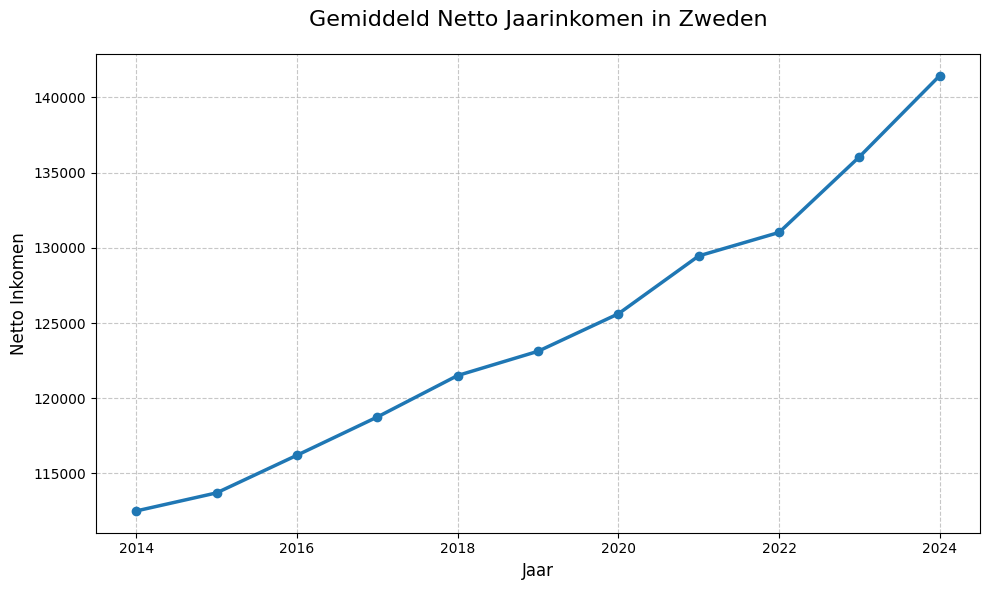

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

income_df = pd.read_csv("processed_data/Annual_Net_Earnings_Sweden_2014-2024.csv")


income_df = income_df[['TIME_PERIOD', 'OBS_VALUE']]
income_df['TIME_PERIOD'] = pd.to_numeric(income_df['TIME_PERIOD'], errors='coerce')
income_df = income_df[income_df['TIME_PERIOD'].between(2014, 2024)]
income_df['OBS_VALUE'] = pd.to_numeric(income_df['OBS_VALUE'], errors='coerce')


income_avg = income_df.groupby('TIME_PERIOD')['OBS_VALUE'].mean().reset_index()
income_avg.rename(columns={'TIME_PERIOD': 'Year', 'OBS_VALUE': 'Avg_Net_Income'}, inplace=True)


plt.figure(figsize=(10,6))
plt.plot(income_avg['Year'], income_avg['Avg_Net_Income'], marker='o', color='#1f77b4', linewidth=2.5)
plt.title('Gemiddeld Netto Jaarinkomen in Zweden', fontsize=16, pad=20)
plt.xlabel('Jaar', fontsize=12)
plt.ylabel('Netto Inkomen', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


De grafiek toont de verandering van het gemiddeld netto jaarinkomen tussen 2014 en 2024. Deze is toegenomen.

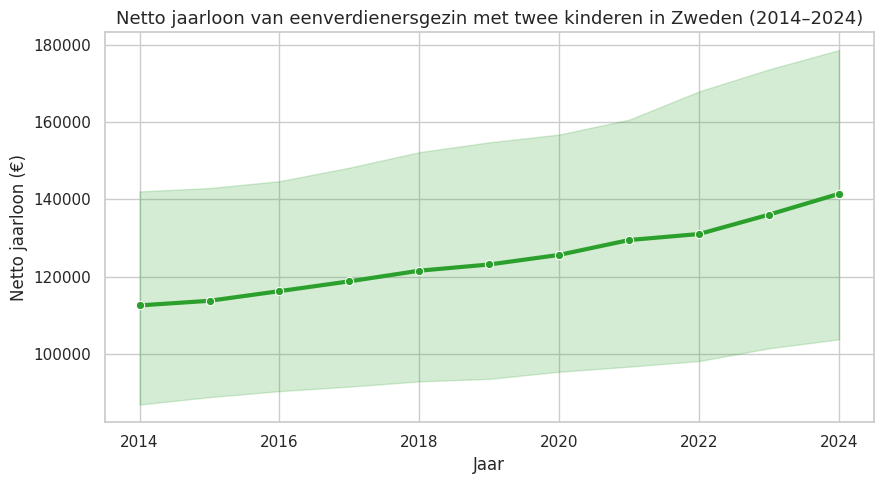

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------------------
# DATA INLADEN
# ------------------------------------------

# Lees netto jaarloon in
earnings_df = pd.read_csv('processed_data/Annual_Net_Earnings_Sweden_2014-2024.csv')

# ------------------------------------------
# PREPROCESSING NETTO JAARLOON (2014–2024)
# ------------------------------------------

earnings_df.rename(columns={
    'TIME_PERIOD': 'Jaar',
    'OBS_VALUE': 'Netto_Jaarloon'
}, inplace=True)

earnings_df = earnings_df[(earnings_df['Jaar'] >= 2014) & (earnings_df['Jaar'] <= 2024)]

# ------------------------------------------
# GRAFIEK – NETTO JAARLOON
# ------------------------------------------

sns.set(style="whitegrid", palette="pastel")
plt.figure(figsize=(9, 5))
sns.lineplot(
    data=earnings_df,
    x="Jaar",
    y="Netto_Jaarloon",
    marker='o',
    linewidth=3,
    color="#2ca02c"  # mooie groene kleur
)
plt.title("Netto jaarloon van eenverdienersgezin met twee kinderen in Zweden (2014–2024)", fontsize=13)
plt.ylabel("Netto jaarloon (€)")
plt.xlabel("Jaar")
plt.grid(True)
plt.tight_layout()
plt.show()

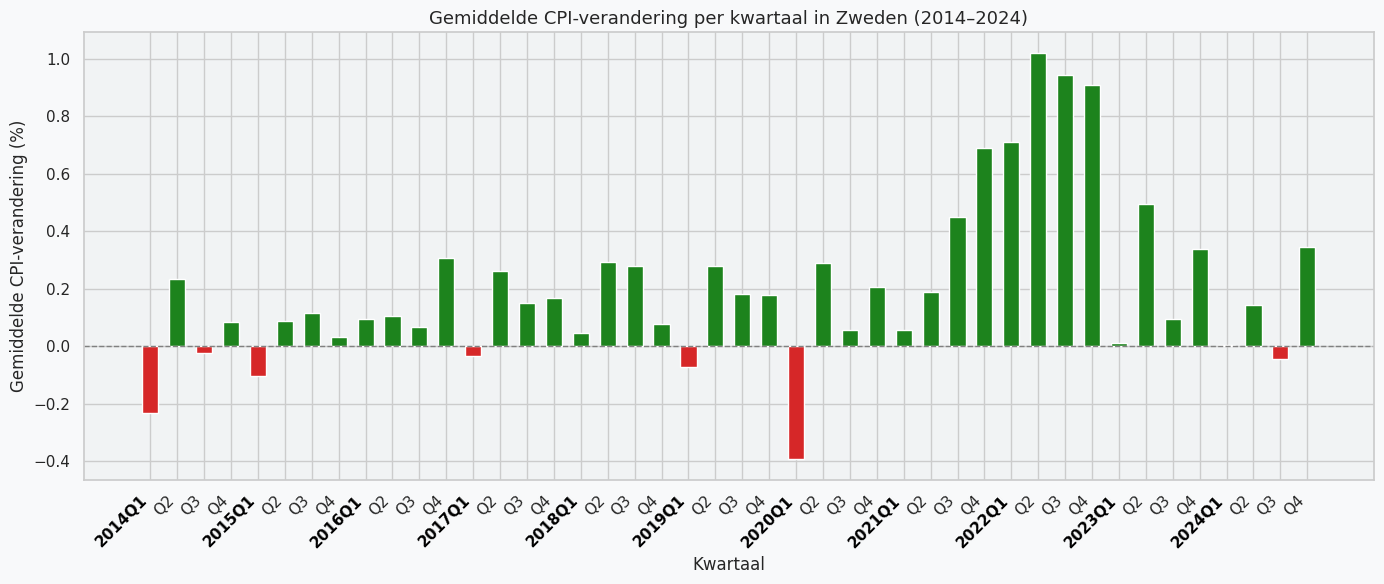

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ------------------------------------------
# DATA INLADEN
# ------------------------------------------

cpi_df = pd.read_csv('processed_data/CPI.csv')

# ------------------------------------------
# PREPROCESSING CPI (2014–2024)
# ------------------------------------------

cpi_df['Maand'] = pd.to_datetime(cpi_df['month'].str.replace('M', '-'), format='%Y-%m')
cpi_df = cpi_df[(cpi_df['Maand'].dt.year >= 2014) & (cpi_df['Maand'].dt.year <= 2024)]
cpi_df['Kwartaal'] = cpi_df['Maand'].dt.to_period('Q').astype(str)
cpi_quarterly = cpi_df.groupby('Kwartaal')['DATA'].mean().reset_index()
cpi_quarterly.rename(columns={'DATA': 'Gemiddelde_CPI'}, inplace=True)
cpi_quarterly['Jaar'] = cpi_quarterly['Kwartaal'].str[:4].astype(int)
cpi_quarterly['Q'] = cpi_quarterly['Kwartaal'].str[-2:]

# ------------------------------------------
# LABELS MAKEN VOOR X-AS
# ------------------------------------------

labels = []
highlight_idx = []
for i in range(len(cpi_quarterly)):
    kwartaal = cpi_quarterly.iloc[i]['Q']
    jaar = cpi_quarterly.iloc[i]['Jaar']
    if kwartaal == 'Q1':
        labels.append(f'{jaar}Q1')
        highlight_idx.append(i)
    else:
        labels.append(kwartaal)

# ------------------------------------------
# KLEUREN DEFINIËREN
# ------------------------------------------

groen = '#1d831d'  # gewenste groene kleur
rood = '#d62728'    # rood voor negatief

colors = [groen if val >= 0 else rood for val in cpi_quarterly['Gemiddelde_CPI']]

# ------------------------------------------
# GRAFIEK TEKENEN (met matplotlib bar, niet sns.barplot)
# ------------------------------------------

plt.figure(figsize=(14, 6), facecolor='#f8f9fa')  # lichte achtergrond

x = np.arange(len(cpi_quarterly))
y = cpi_quarterly['Gemiddelde_CPI']

bars = plt.bar(x, y, color=colors, width=0.6)

plt.xticks(x, labels, rotation=45, ha='right')

ax = plt.gca()

# Q1 labels vet en zwart maken
for i, label in enumerate(ax.get_xticklabels()):
    if i in highlight_idx:
        label.set_weight("bold")
        label.set_color("black")

plt.title("Gemiddelde CPI-verandering per kwartaal in Zweden (2014–2024)", fontsize=13)
plt.ylabel("Gemiddelde CPI-verandering (%)")
plt.xlabel("Kwartaal")

ax.axhline(0, color='gray', linestyle='--', linewidth=1)
ax.set_facecolor('#f1f3f4')  # zachte achtergrond tint

plt.tight_layout()
plt.show()

